In [2]:
import pandas
import matplotlib.pyplot as plt

In [3]:
cities = pandas.read_csv('US_cities.csv')
cities.sample(5)

,id,Country,City,AccentCity,Region,Population,Latitude,Longitude
3697,3028455,us,live oak,Live Oak,TX,10193.0,29.565000,-98.336111
778,2927792,us,brent,Brent,FL,22735.0,30.468611,-87.236111
1322,2940234,us,northlake,Northlake,IL,11497.0,41.917222,-87.895556
2266,2976128,us,ellisville,Ellisville,MO,9362.0,38.592500,-90.586944
893,2929242,us,melbourne,Melbourne,FL,76326.0,28.083333,-80.608333


In [4]:
import geopandas
cafes = geopandas.read_file('cafes_us_OSM.geojson')
cafes.sample()

,id,@id,amenity,building,cuisine,name,operator,wheelchair,website,addr:city,...,karaoke,gambling,reservation,tourism:disused,indoor:level,landuse,diet:raw,name:it,amenity:ice_cream,geometry
6397,node/2037620890,node/2037620890,cafe,None,coffee_shop,Starbucks,None,None,None,None,...,None,None,None,None,None,None,None,None,None,POINT (-122.9160315 46.9987745)


In [5]:
cafes.sample().T.dropna()

,19338
id,node/4831902733
@id,node/4831902733
amenity,cafe
name,Three Fifty Bakery & Coffee Bar
website,http://threefifty.com
addr:city,Washington
addr:housenumber,1926
addr:street,17th Street Northwest
opening_hours,Mo-Fr 07:00-19:00; Sa-Su 08:00-18:00
addr:postcode,20009


In [6]:
cafes['count'] = 1
cafes[['cuisine', 'count']].groupby('cuisine').sum().sort_values('count', ascending=False)[:10]

,count
cuisine,
coffee_shop,6166
donut,625
ice_cream,290
sandwich,284
american,220
coffee,78
cafe,73
regional,71
bagel,64


In [7]:
sorted(list(cafes.columns))

['@id',
 'Door',
 'FIXME',
 'Notes',
 'access',
 'addr',
 'addr.source:street',
 'addr:city',
 'addr:country',
 'addr:county',
 'addr:direction',
 'addr:door',
 'addr:flats',
 'addr:floor',
 'addr:full',
 'addr:house',
 'addr:housename',
 'addr:housenumber',
 'addr:interpolation',
 'addr:place',
 'addr:postcode',
 'addr:province',
 'addr:state',
 'addr:street',
 'addr:street:name',
 'addr:street:prefix',
 'addr:street:type',
 'addr:street_direction_prefix',
 'addr:suburb',
 'addr:suite',
 'addr:unit',
 'addr:unit_1',
 'address',
 'aka',
 'alcohol',
 'alt_name',
 'alt_name2',
 'alt_name_1',
 'alt_name_2',
 'amenity',
 'amenity:bar',
 'amenity:historic',
 'amenity:ice_cream',
 'amenity_1',
 'amenity_2',
 'approximate',
 'atm',
 'atm:operator',
 'attribution',
 'automatic_door',
 'bakery',
 'bar',
 'beer',
 'bicycle_parking',
 'black_owned',
 'branch',
 'brand',
 'brand:wikidata',
 'brewery',
 'building',
 'building:levels',
 'building:part',
 'bus',
 'cafe',
 'camera:mount',
 'capacity',

In [8]:
cafes.isnull().sum() / len(cafes)

id                          0.000000
@id                         0.000000
amenity                     0.000000
building                    0.998607
cuisine                     0.552107
name                        0.030798
operator                    0.970932
wheelchair                  0.950800
website                     0.814443
addr:city                   0.763946
addr:country                0.961514
addr:housenumber            0.665257
addr:province               0.971412
addr:street                 0.657954
internet_access             0.852784
opening_hours               0.866766
payment:amex                0.985154
payment:coins               0.984817
payment:notes               0.984817
recycling:coffee_cups       0.999856
created_by                  0.995628
addr:postcode               0.764186
description                 0.992024
hst_number                  0.999760
self_checkout               0.999952
capacity                    0.998847
smoking                     0.948734
w

In [9]:
cafes = cafes.T[cafes.isnull().sum() / len(cafes) < 0.6].T
cafes.sample(5)

,id,@id,amenity,cuisine,name,geometry,count
8790,node/2529582517,node/2529582517,cafe,None,Starbucks,POINT (-71.58915519999999 42.3393875),1
3314,node/1151336635,node/1151336635,cafe,None,à la mode,POINT (-123.134633 49.2724188),1
1996,node/734278762,node/734278762,cafe,None,Corner Bakery,POINT (-77.0316782 38.8971432),1
9262,node/2623014627,node/2623014627,cafe,coffee_shop,Starbucks,POINT (-73.96366860000001 40.7659236),1
16476,node/4317203896,node/4317203896,cafe,None,Tim Hortons,POINT (-78.37234909999999 44.274963),1


In [10]:
del cafes['id']
del cafes['@id']
cafes.sample()

,amenity,cuisine,name,geometry,count
12062,cafe,None,Flying M,POINT (-112.4353994 37.8322262),1


In [60]:
us_geo = geopandas.read_file('us_20m.json')
us_geo.crs = {'init' :'epsg:4326'}
us_geo = us_geo.to_crs({'init': 'epsg:3395'})

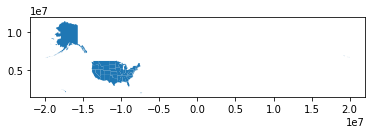

In [61]:
us_geo.plot()
# plt.xlim((-2, -0.5))
plt.show()

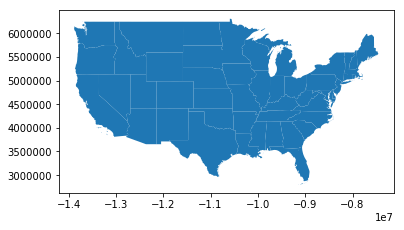

In [67]:
us_geo = us_geo[(us_geo.NAME != "Hawaii") & (us_geo.NAME != "Alaska") & (us_geo.NAME != "Puerto Rico")]
us_geo.plot()
plt.show()

In [62]:
cafes = geopandas.GeoDataFrame(cafes)
cafes.crs = {'init' :'epsg:4326'}
cafes = cafes.to_crs({'init': 'epsg:3395'})

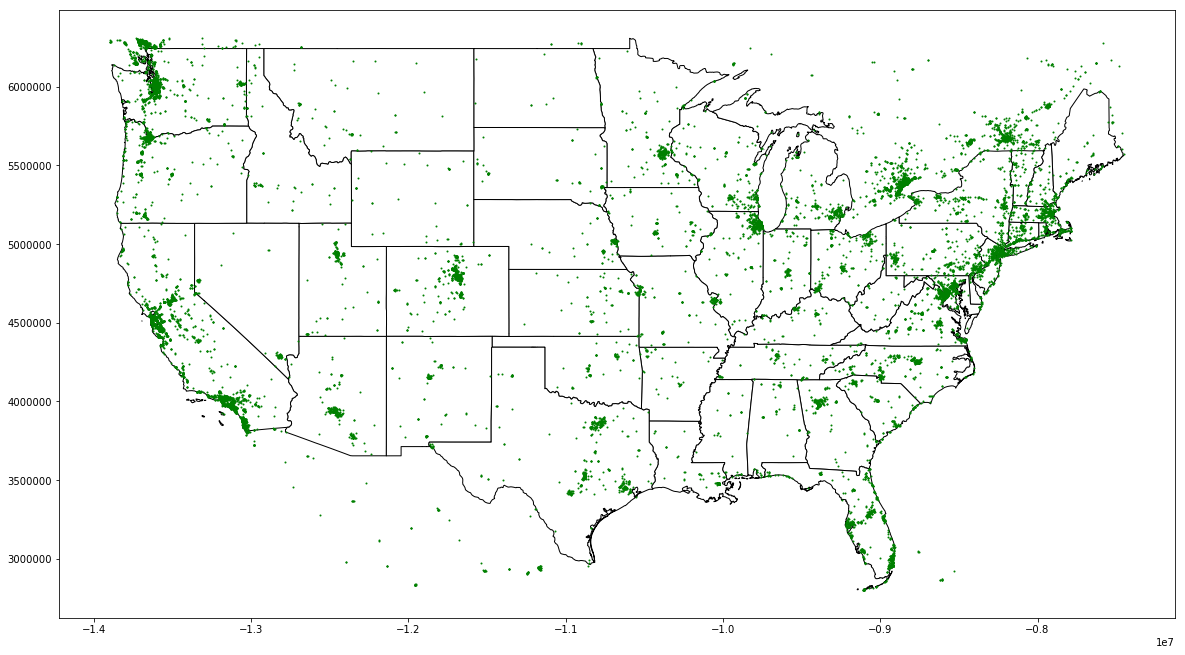

In [69]:
base = us_geo.plot(color='white', edgecolor='black', figsize=(20,20))
cafes.plot(ax=base, marker='o', color='green', markersize=1)
plt.show()

### References

Geopandas mapping: http://geopandas.org/mapping.html